# **AIM**:- Color Image Segmentation using Clustering technique

# **Theory**

**Image Segmentation:**
Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as superpixels). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

**Clustering for Image Segmentation:**
Clustering is an unsupervised machine learning technique that aims to group similar data points together. In the context of image segmentation, each pixel is treated as a data point with features such as color, intensity, and texture. Clustering algorithms can then be used to group pixels with similar features into segments.

**Common Clustering Algorithms for Image Segmentation:**

* **K-Means Clustering:** A simple and widely used algorithm that partitions data into K clusters, where K is a user-defined parameter.
* **Mean Shift Clustering:** A non-parametric algorithm that does not require the number of clusters to be specified beforehand.
* **Hierarchical Clustering:**  A method that builds a hierarchy of clusters. It can be either agglomerative (bottom-up) or divisive (top-down).

**Steps for Image Segmentation using Clustering:**

1. **Preprocessing:** Load the image and convert it to a suitable format for clustering (e.g., a NumPy array).
2. **Feature Extraction:** Extract relevant features from the image pixels (e.g., color components, texture features).
3. **Clustering:** Apply a clustering algorithm to group the pixels based on their features.
4. **Label Assignment:** Assign a unique label to each cluster.
5. **Visualization:** Display the segmented image by mapping each label to a distinct color.

**Applications of Image Segmentation:**

* **Object Recognition:** Identifying objects within an image for tasks like self-driving cars, robotics, and surveillance.
* **Medical Imaging:** Segmenting organs, tissues, or abnormalities for diagnosis and treatment planning.
* **Image Editing:**  Selecting specific regions of an image for manipulation.


# **Code:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

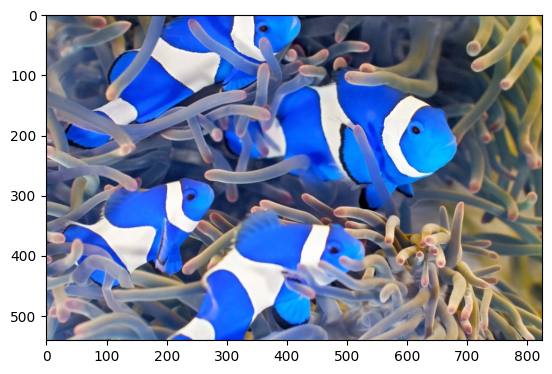

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CVR Lab/clown_fish.png')
plt.imshow(img)

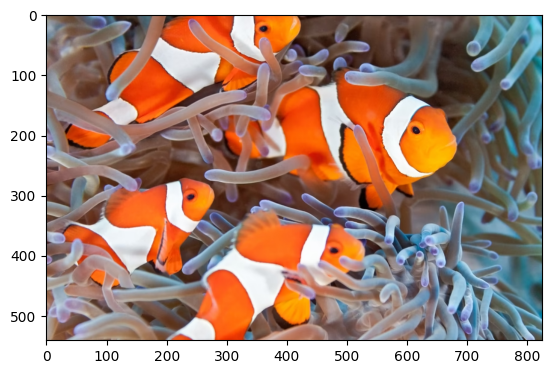

In [ ]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [ ]:
data = rgb_img.reshape(-1, 3)
data = np.float32(data)

In [ ]:
rgb_img.shape

(541, 825, 3)

In [ ]:
data.shape

(446325, 3)

In [ ]:
K=4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

955742460.9579588

In [ ]:
labels

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int32)

In [ ]:
centers

array([[235.61021 ,  98.850075,  22.369156],
       [215.42522 , 219.81935 , 226.47672 ],
       [ 89.716965,  71.37467 ,  63.853607],
       [140.6075  , 137.23953 , 143.53548 ]], dtype=float32)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
segmented_labels = labels.reshape(rgb_img.shape[0],rgb_img.shape[1])

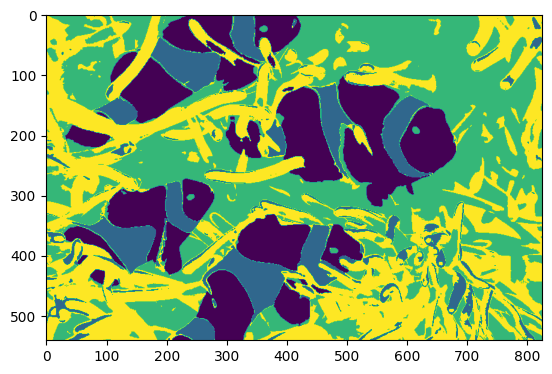

In [ ]:
plt.imshow(segmented_labels)

In [ ]:
cluster_masks = []
for i in range(K):
  mask = (segmented_labels == i)
  cluster_masks.append(mask)

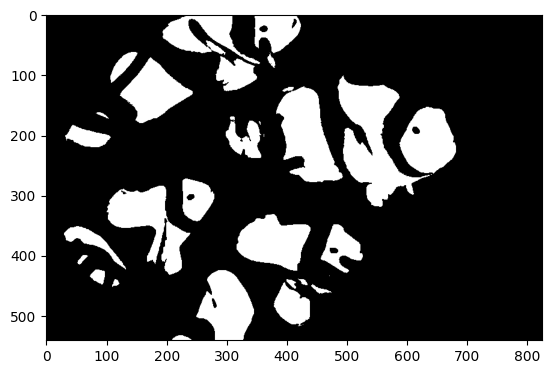

In [ ]:
plt.imshow(cluster_masks[0],cmap = 'gray')

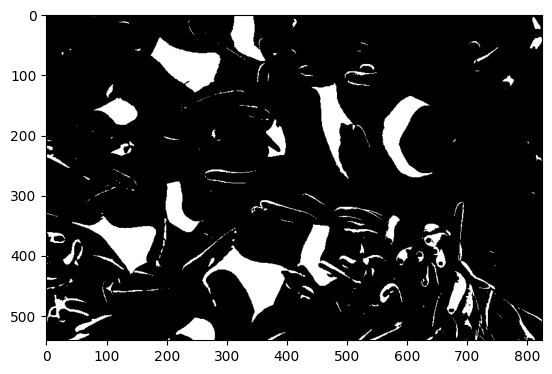

In [ ]:
plt.imshow(cluster_masks[1],cmap = 'gray')

In [ ]:
cluster_masks_image = []
for i , mask in enumerate(cluster_masks):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(rgb_img)
  cluster_mask_rgb[mask] = cluster_color
  cluster_masks_image.append(cluster_mask_rgb)

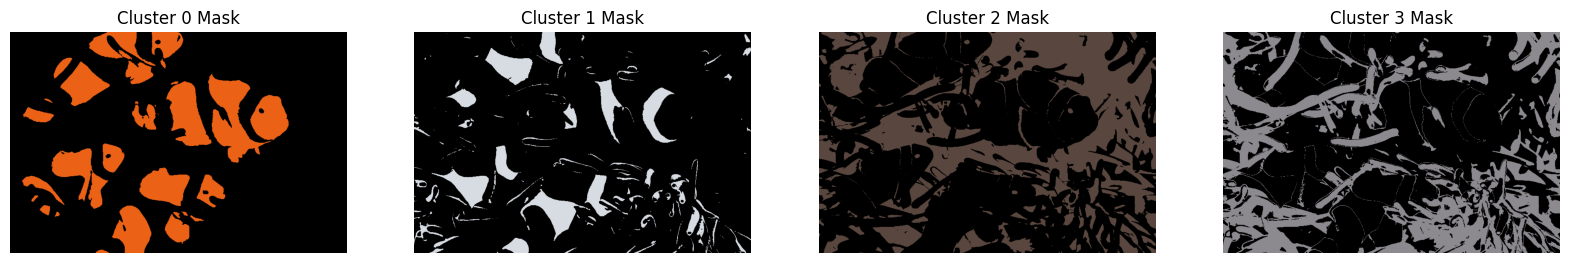

In [ ]:
plt.figure(figsize=(20,20))
for i, mask_image in enumerate(cluster_masks_image):
  plt.subplot(1,K,i+1)
  plt.imshow(mask_image)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')



In [ ]:
merged_mask = cluster_masks[0] | cluster_masks[1]

In [ ]:
merged_mask_rgb = np.zeros_like(rgb_img)
merged_mask_rgb[merged_mask] = rgb_img[merged_mask]

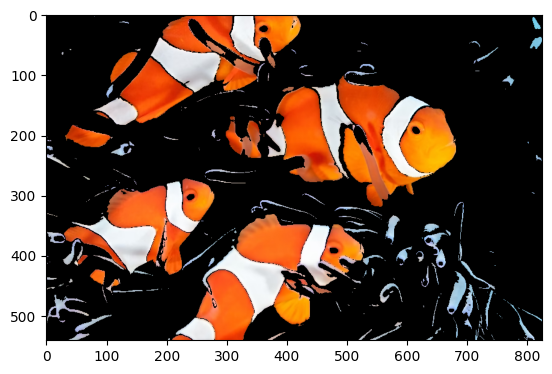

In [ ]:
plt.imshow(merged_mask_rgb)

# **Task**

1. Import image "Bird_segmentation.png" image using cv2
2. Convert image from BGR to RGB.
3. Separate the Bird region from the image using clustering segmentation approach.
4. Perform appropriate morphological operations to refine the segmentation results.
5. Import image "fruits_segment.png" image using cv2
6. Convert image from BGR to RGB.
7. Separate the different fruits region from the image using clustering segmentation approach and Perform appropriate morphological operations to refine the segmentation results.

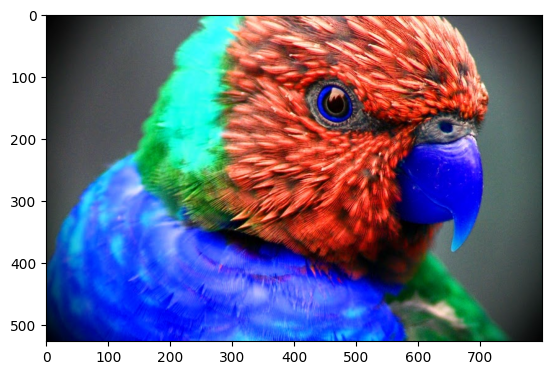

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/CVR Lab/Bird_segmentation.jpg')
plt.imshow(img2)

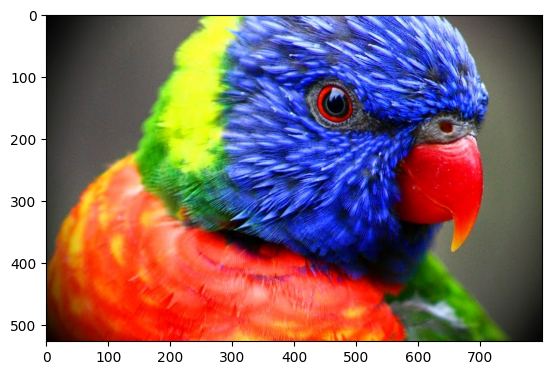

In [ ]:
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img2)

In [ ]:
data2 = rgb_img2.reshape(-1, 3)
data2 = np.float32(data2)

In [ ]:
rgb_img2.shape

(526, 800, 3)

In [ ]:
K=6
criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data2, K, None, criteria2, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

1192311890.374188

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
segmented_labels2 = labels.reshape(rgb_img2.shape[0],rgb_img2.shape[1])

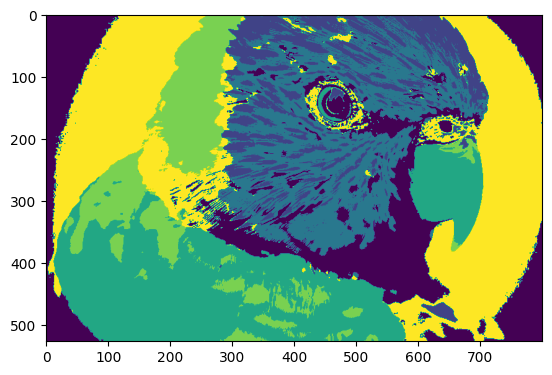

In [ ]:
plt.imshow(segmented_labels2)

In [ ]:
cluster_masks2 = []
for i in range(K):
  mask = (segmented_labels2 == i)
  cluster_masks2.append(mask)

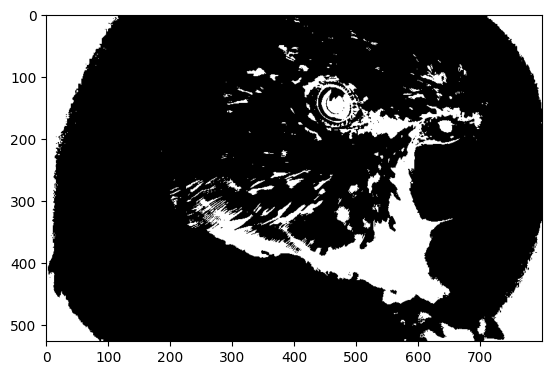

In [ ]:
plt.imshow(cluster_masks2[0],cmap = 'gray')

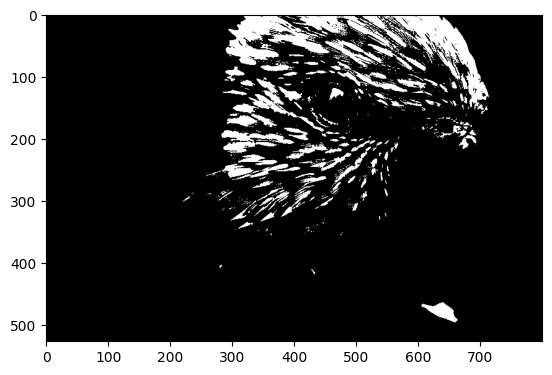

In [ ]:
plt.imshow(cluster_masks2[1],cmap = 'gray')

In [ ]:
cluster_masks_image2 = []
for i , mask in enumerate(cluster_masks2):
  cluster_color2 = centers[i]
  cluster_mask_rgb2 = np.zeros_like(rgb_img2)
  cluster_mask_rgb2[mask] = cluster_color2
  cluster_masks_image2.append(cluster_mask_rgb2)

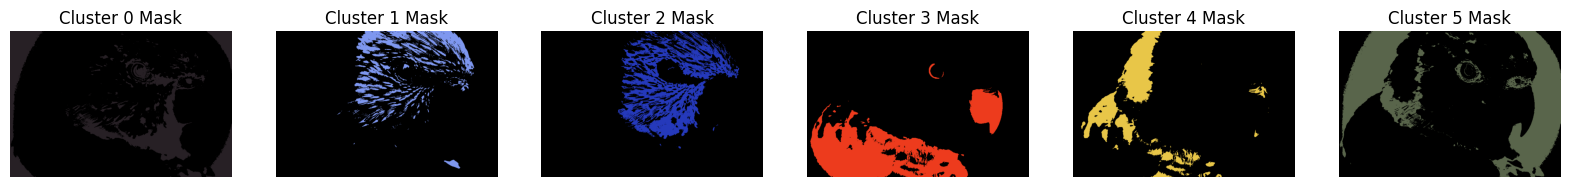

In [ ]:
plt.figure(figsize=(20, 20))
for i, mask_image in enumerate(cluster_masks_image2):
    plt.subplot(1, K, i + 1)
    plt.imshow(mask_image)
    plt.title(f'Cluster {i} Mask')
    plt.axis('off')


In [ ]:
merged_mask2 =  cluster_masks2[2] |cluster_masks2[3] | cluster_masks2[4] | cluster_masks2[5]


In [ ]:
merged_mask_rgb2 = np.zeros_like(rgb_img2)
merged_mask_rgb2[merged_mask2] = rgb_img2[merged_mask2]

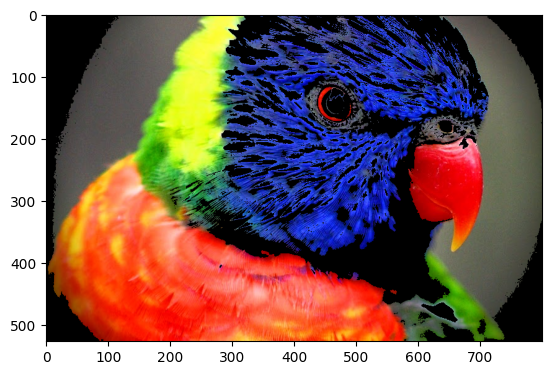

In [ ]:
plt.imshow(merged_mask_rgb2)

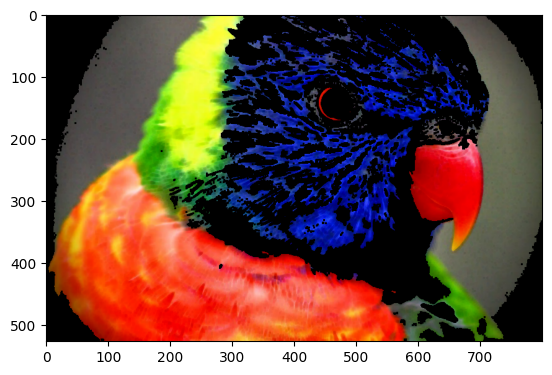

In [ ]:
kernal = np.ones((3,3))
erosion_1 = cv2.erode(merged_mask_rgb2,kernal,iterations = 1)
plt.imshow(erosion_1)

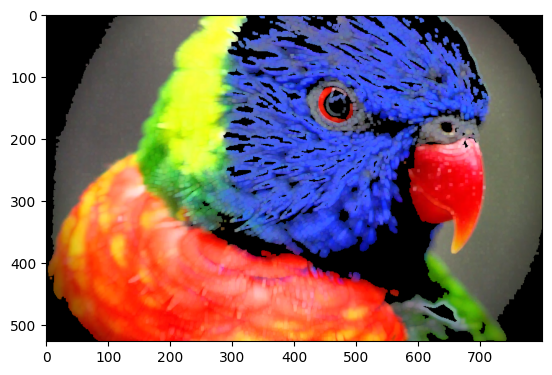

In [ ]:
kernal = np.ones((2,2))
dilate_1 = cv2.dilate(merged_mask_rgb2,kernal,iterations =3)
plt.imshow(dilate_1)

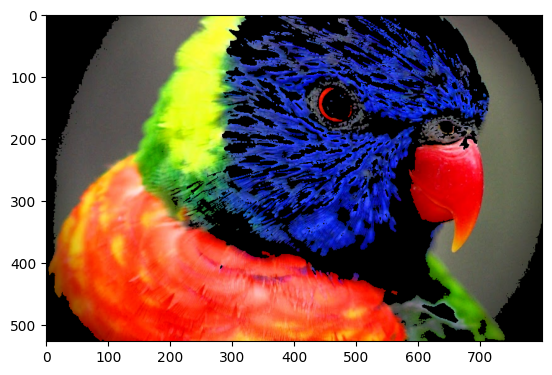

In [ ]:

opening = cv2.morphologyEx(merged_mask_rgb2,cv2.MORPH_OPEN,kernal)
plt.imshow(opening)

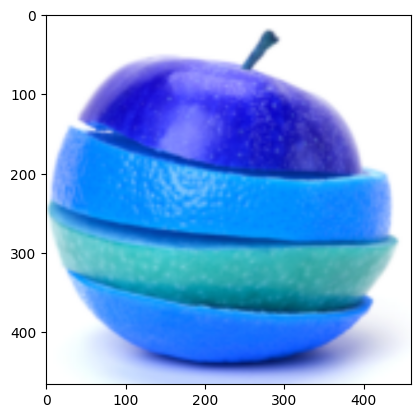

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/CVR Lab/fruits_segment.png')
plt.imshow(img3)

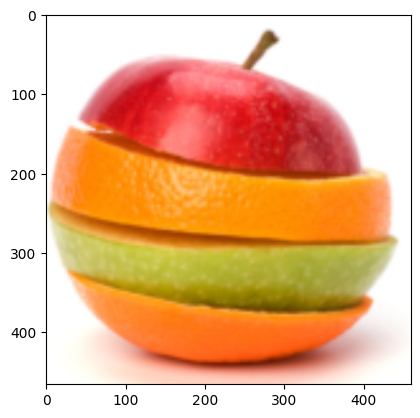

In [ ]:
rgb_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img3)

In [ ]:
data3 = rgb_img3.reshape(-1, 3)
data3 = np.float32(data3)

In [ ]:
K=5
criteria3 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data3, K, None, criteria3, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

269519858.6675924

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
segmented_labels3 = labels.reshape(rgb_img3.shape[0],rgb_img3.shape[1])

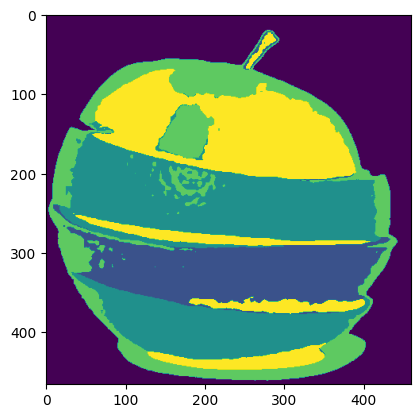

In [ ]:
plt.imshow(segmented_labels3)

In [ ]:
cluster_masks3 = []
for i in range(K):
  mask3 = (segmented_labels3 == i)
  cluster_masks3.append(mask3)

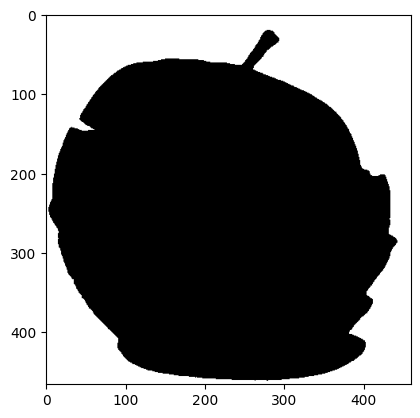

In [ ]:
plt.imshow(cluster_masks3[0],cmap = 'gray')

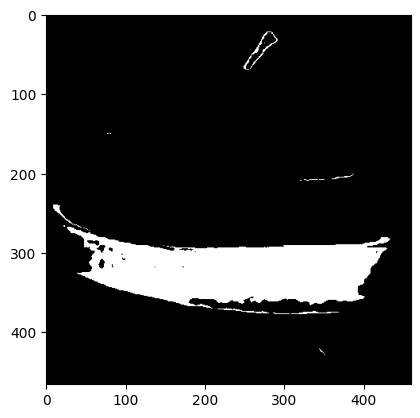

In [ ]:
plt.imshow(cluster_masks3[1],cmap = 'gray')

In [ ]:
cluster_masks_image3 = []
for i , mask3 in enumerate(cluster_masks3):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(rgb_img3)
  cluster_mask_rgb[mask3] = cluster_color
  cluster_masks_image3.append(cluster_mask_rgb)

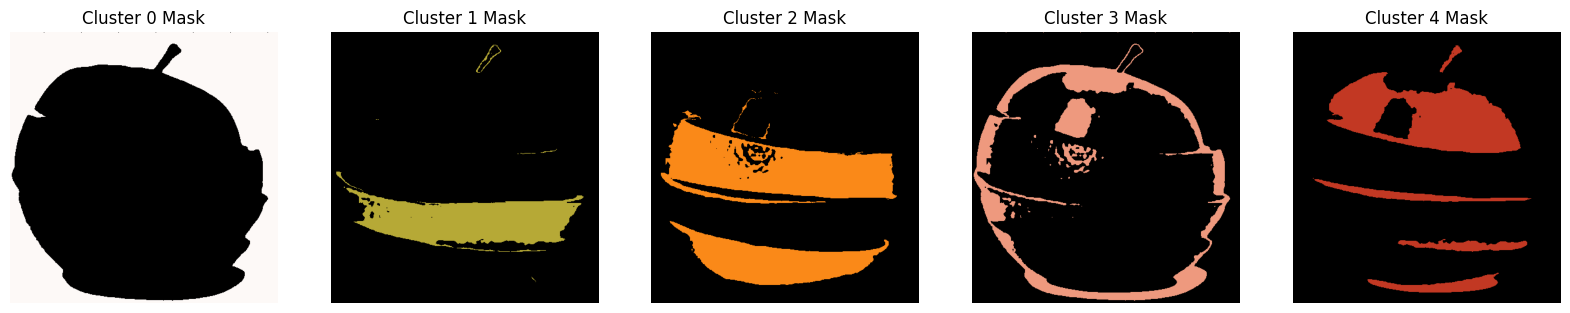

In [ ]:
plt.figure(figsize=(20,20))
for i, mask_image in enumerate(cluster_masks_image3):
  plt.subplot(1,K,i+1)
  plt.imshow(mask_image)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

In [ ]:
merged_mask3 = cluster_masks3[1] | cluster_masks3[2] | cluster_masks3[3] | cluster_masks3[4]

In [ ]:
merged_mask_rgb3 = np.zeros_like(rgb_img3)
merged_mask_rgb3[merged_mask3] = rgb_img3[merged_mask3]

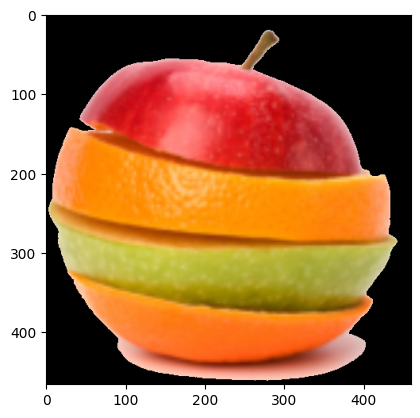

In [ ]:
plt.imshow(merged_mask_rgb3)

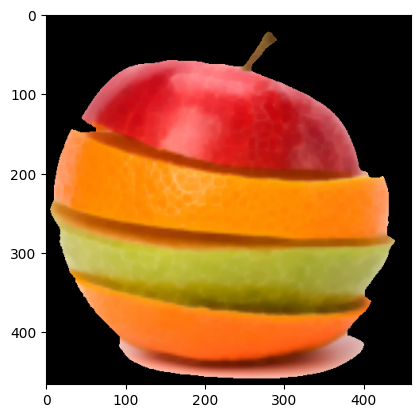

In [ ]:
kernal = np.ones((3,3))
erosion_2 = cv2.erode(merged_mask_rgb3,kernal,iterations = 2)
plt.imshow(erosion_2)

# **Conclusion**

In this experiment, we explored color image segmentation using the k-means clustering technique. We successfully segmented images into distinct regions based on color similarity.

Key takeaways:

* **K-means Effectiveness:** K-means proved to be an effective method for grouping pixels with similar colors, allowing us to isolate objects or regions of interest.
* **Parameter Selection:** The choice of 'K' (number of clusters) significantly impacts the segmentation results. Experimenting with different 'K' values is crucial for optimal segmentation.
* **Post-processing:** Techniques like erosion and dilation can refine the segmented masks, improving the accuracy of object boundaries.

Overall, clustering-based image segmentation is a valuable tool for various computer vision tasks, including object recognition, medical imaging analysis, and image editing.